---
# [LazyPlot](https://linescanning.readthedocs.io/en/latest/classes/plotting.html#linescanning.plotting.LazyPlot)

Sometimes it's a bit cumbersome to go through all matplotlib motions such as intiating the figure, adding labels, and such when you just want to quickly visualize your data. This class is intended to do just that. Make the same plots in a whole lot less lines. I tried to include as many functionalities as possible without overcomplicating the process too much. Below are a few examples of how to use this class.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# imports
from linescanning import plotting, utils
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

warnings.simplefilter('ignore')
opj = os.path.join


Create random timeseries with `linescanning.utils.random_timeseries`

In [3]:
print(utils.random_timeseries.__doc__)

random_timeseries

    Create a random timecourse by multiplying an intercept with a random Gaussian distribution.

    Parameters
    ----------
    intercept: float
        starting point of timecourse
    volatility: float
        this factor is multiplied with the Gaussian distribution before multiplied with the intercept
    nr: int
        length of timecourse 

    Returns
    ----------
    numpy.ndarray
        array of length `nr`

    Example
    ----------
    >>> from linescanning import utils
    >>> ts = utils.random_timeseries(1.2, 0.5, 100)

    Notes
    ----------
    Source: https://stackoverflow.com/questions/67977231/how-to-generate-random-time-series-data-with-noise-in-python-3
    


Plot them regularly

(100,)


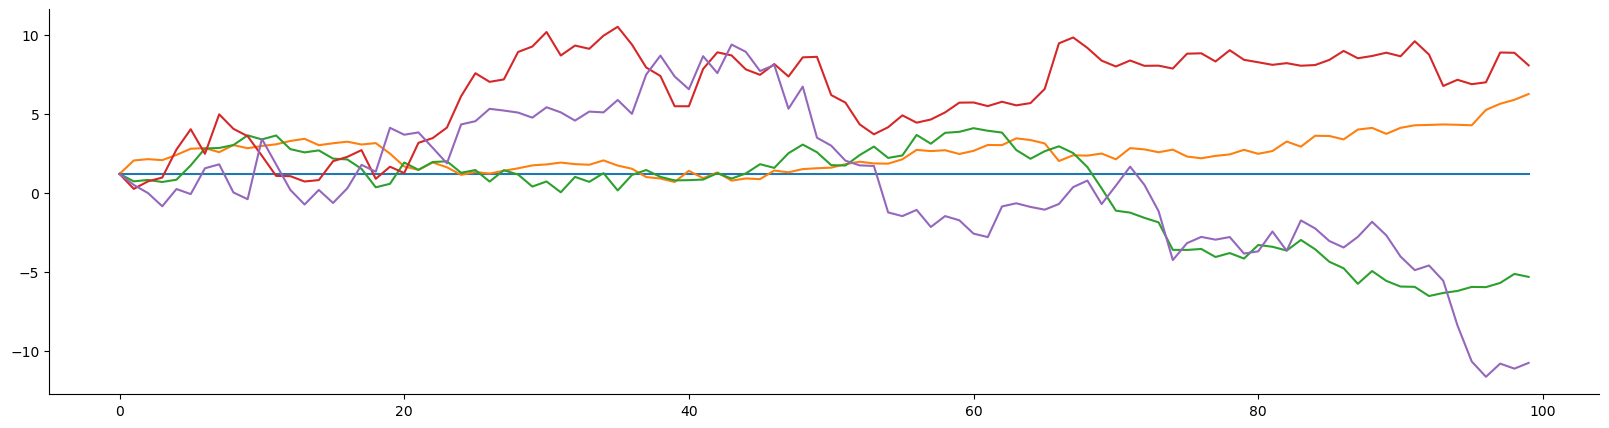

In [5]:
ts = utils.random_timeseries(1.2, 0.0, 100)
ts1 = utils.random_timeseries(1.2, 0.3, 100)
ts2 = utils.random_timeseries(1.2, 0.5, 100)
ts3 = utils.random_timeseries(1.2, 0.8, 100)
ts4 = utils.random_timeseries(1.2, 1, 100)
print(ts.shape)

fig,axs = plt.subplots(figsize=(20,5))
axs.plot(ts)
axs.plot(ts1)
axs.plot(ts2)
axs.plot(ts3)
axs.plot(ts4)
sns.despine(offset=0)


Use `LazyPlot` to plot a single timeseries

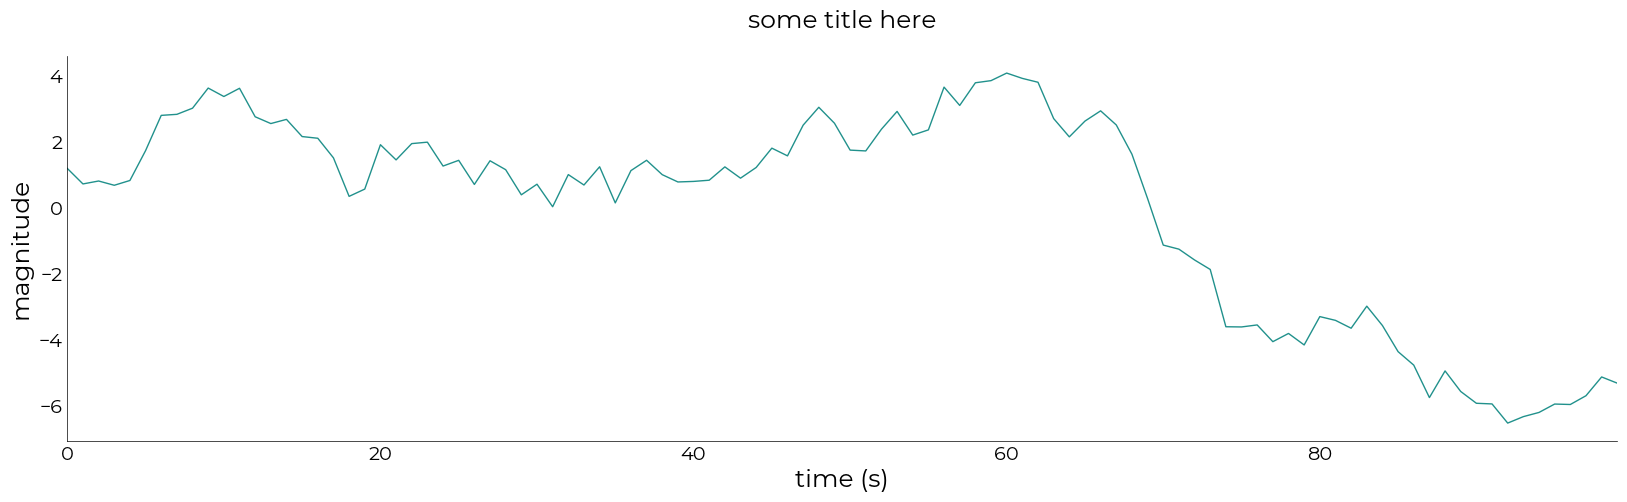

In [15]:
plotting.LazyPlot(
    ts2, 
    figsize=(20, 5),
    x_label="time (s)",
    y_label="magnitude",
    title="some title here")


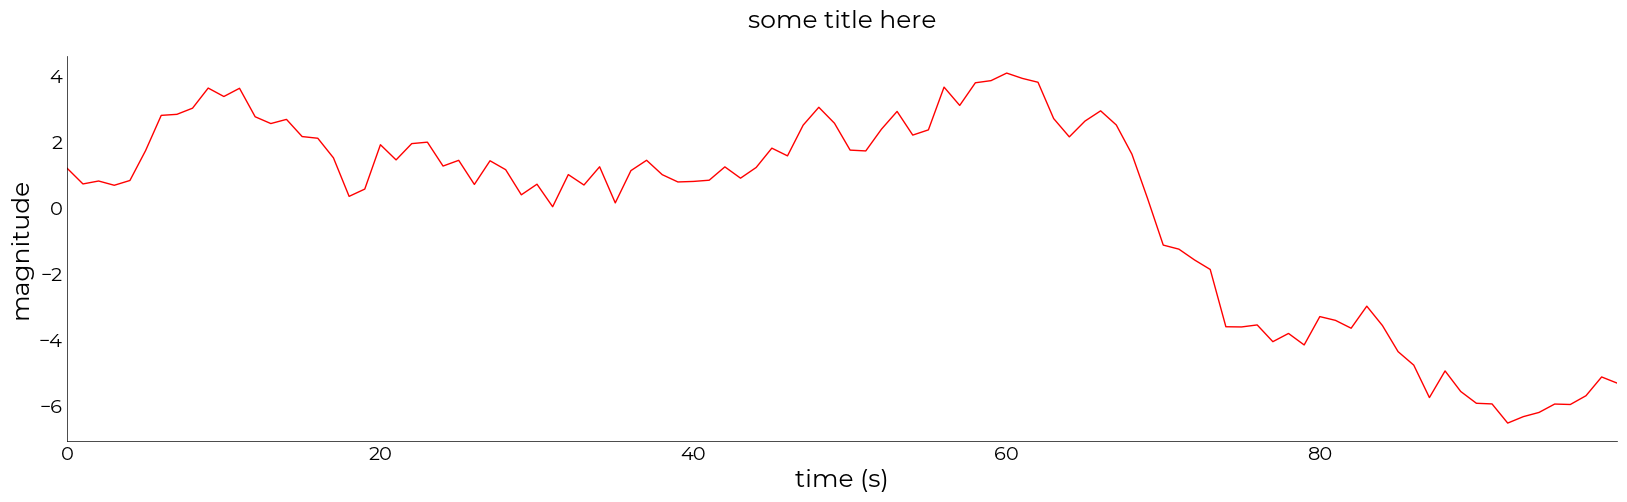

In [23]:
# change the color
plotting.LazyPlot(
    ts2, 
    figsize=(20, 5),
    color="r",
    x_label="time (s)",
    y_label="magnitude",
    title="some title here")


Use `LazyPlot` to plot multiply timeseries

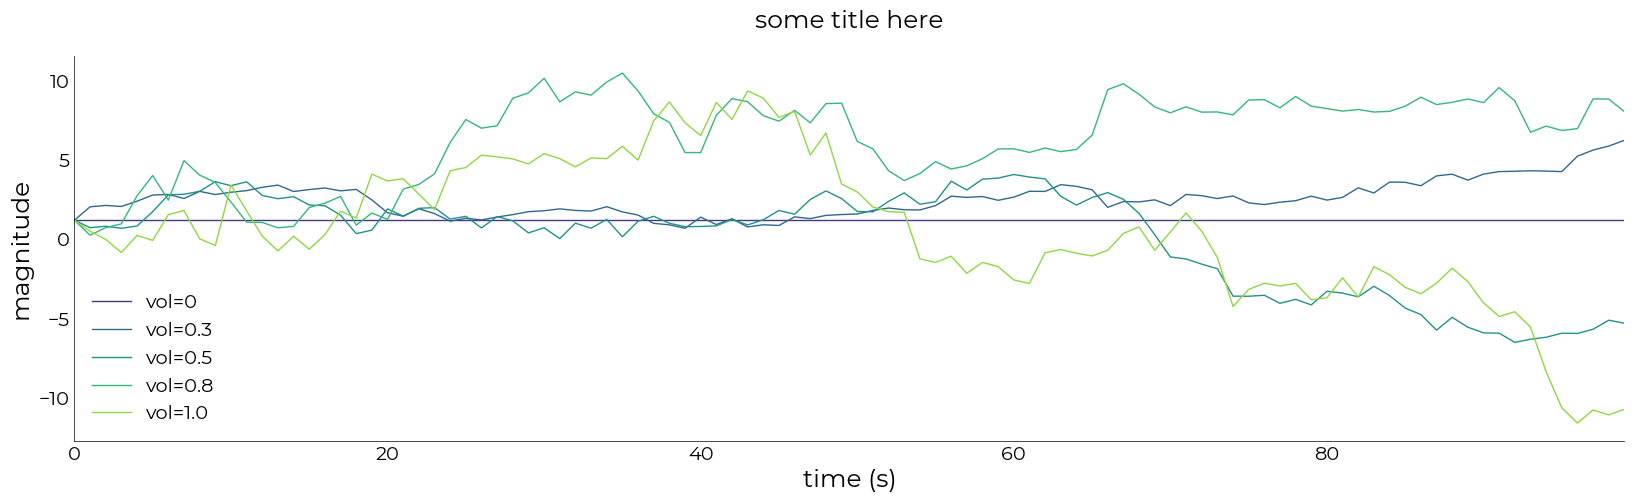

In [16]:
plotting.LazyPlot(
    [ts, ts1, ts2, ts3, ts4], 
    figsize=(20, 5), 
    # save_as="/mnt/d/FSL/shared/spinoza/programs/project_repos/PlayGround/results/test_LazyPlot.pdf",
    labels=['vol=0', 'vol=0.3', 'vol=0.5', 'vol=0.8', 'vol=1.0'],
    x_label="time (s)",
    y_label="magnitude",
    title="some title here")


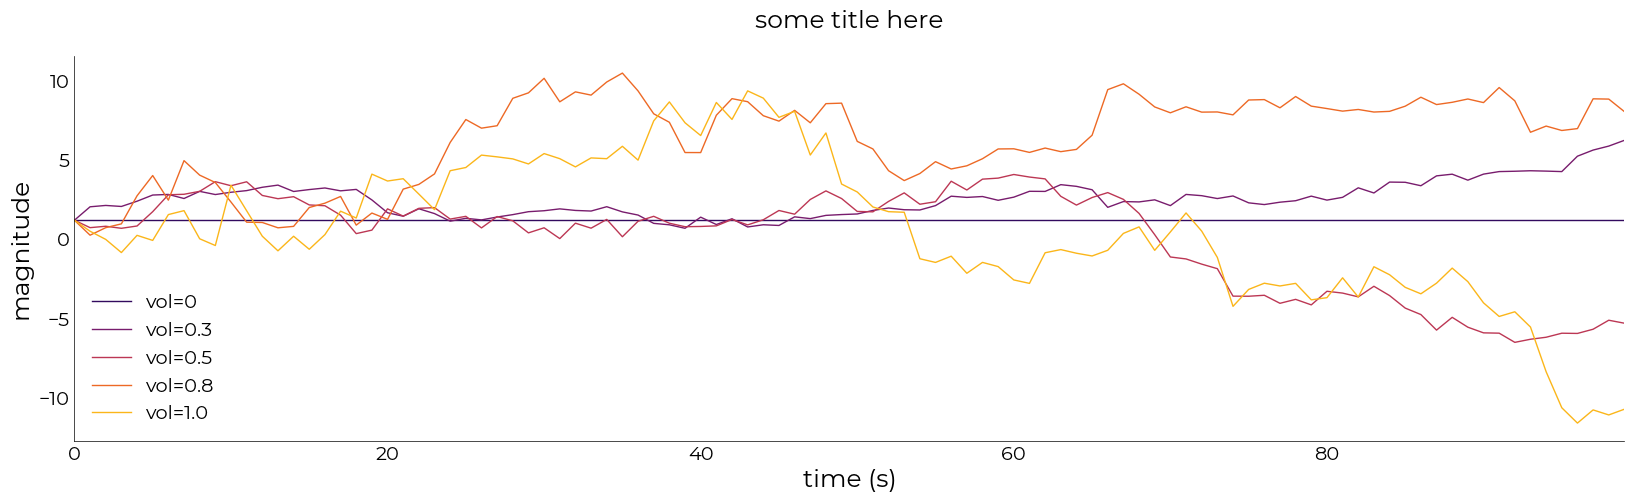

In [22]:
# change colormap
plotting.LazyPlot(
    [ts, ts1, ts2, ts3, ts4], 
    figsize=(20, 5), 
    # save_as="/mnt/d/FSL/shared/spinoza/programs/project_repos/PlayGround/results/test_LazyPlot.pdf",
    labels=['vol=0', 'vol=0.3', 'vol=0.5', 'vol=0.8', 'vol=1.0'],
    x_label="time (s)",
    y_label="magnitude",
    title="some title here",
    cmap="inferno")


Add horizontal line

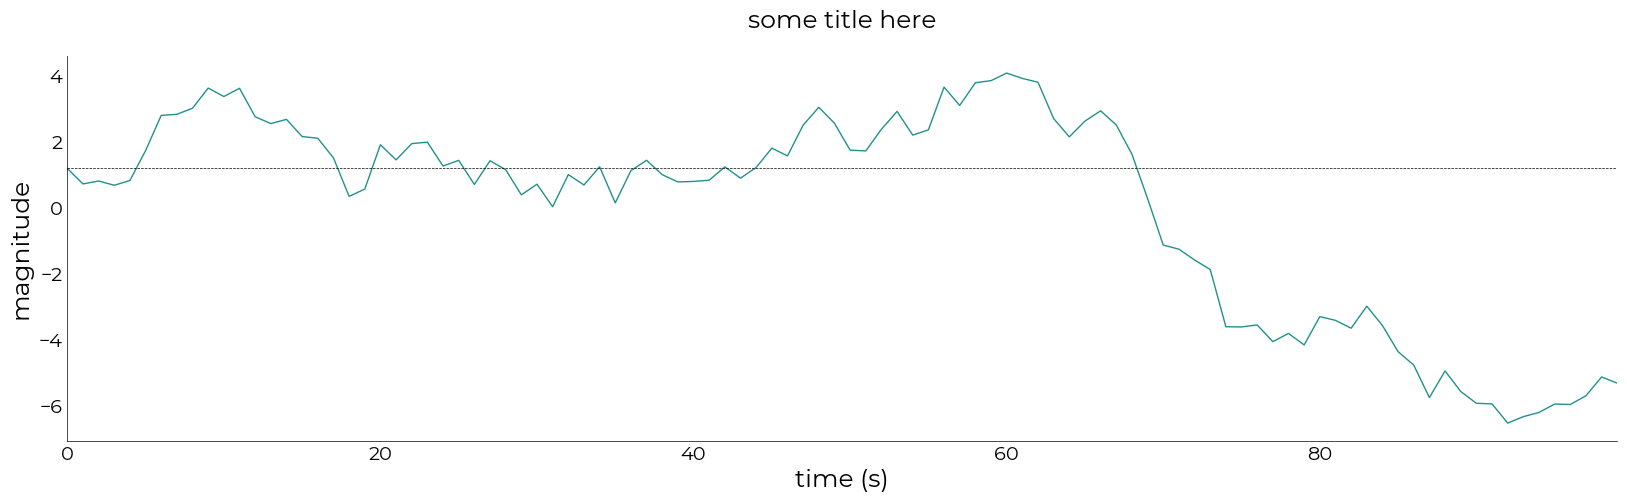

In [17]:
hline = {'pos': 1.2}
plotting.LazyPlot(
    ts2, 
    figsize=(20, 5), 
    add_hline=hline,
    x_label="time (s)",
    y_label="magnitude",
    title="some title here")

Add vertical line

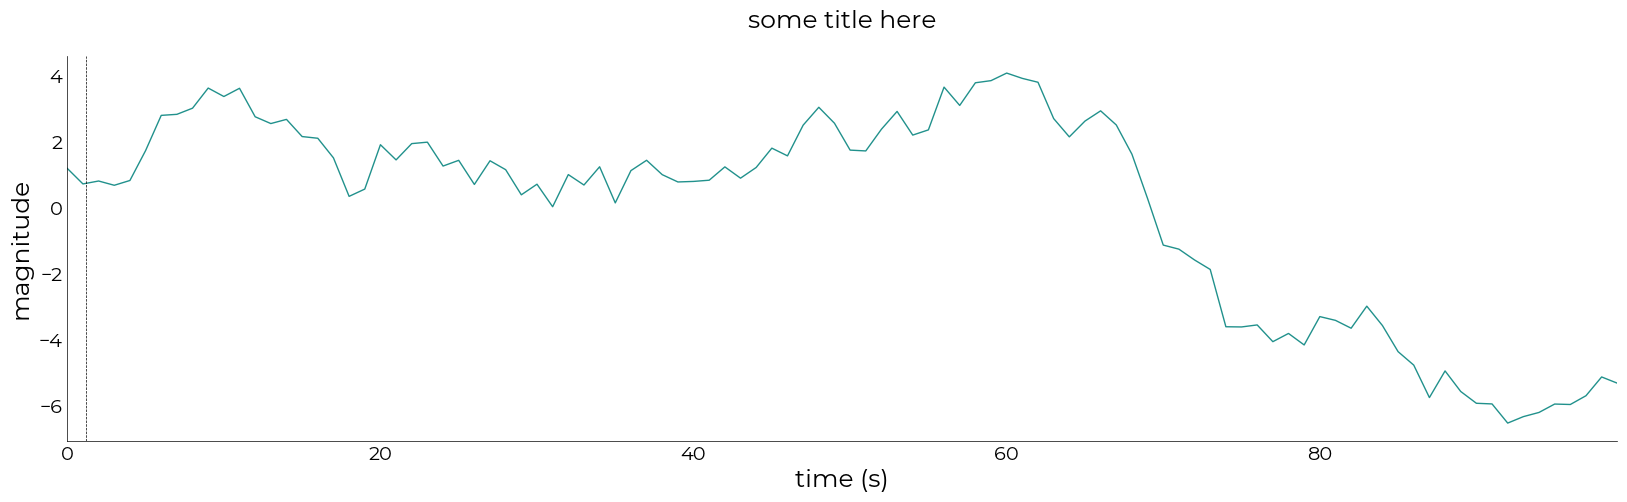

In [18]:
vline = {'pos': 1.2}
plotting.LazyPlot(
    ts2, 
    figsize=(20, 5), 
    add_vline=vline,
    x_label="time (s)",
    y_label="magnitude",
    title="some title here")


Add shaded error

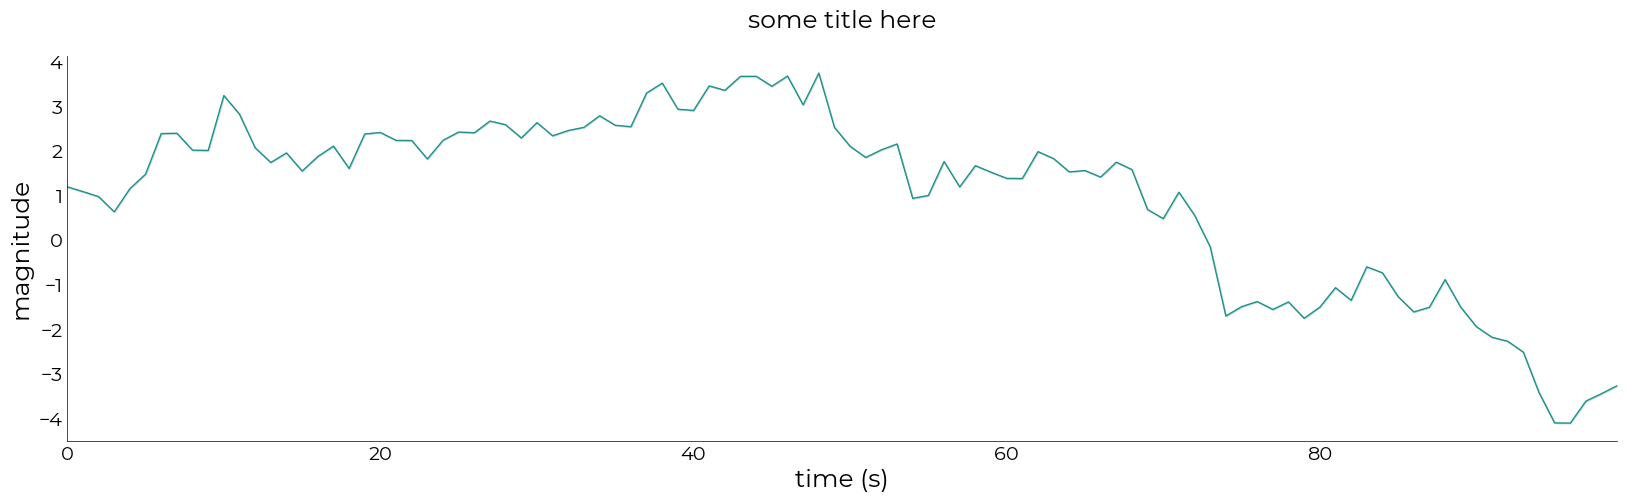

In [19]:
from scipy.stats import sem
stack = np.hstack((ts1[...,np.newaxis],ts2[...,np.newaxis],ts4[...,np.newaxis]))
avg = stack.mean(axis=-1)
err = sem(stack, axis=-1)
plotting.LazyPlot(
    avg, 
    figsize=(20, 5), 
    error=err,
    x_label="time (s)",
    y_label="magnitude",
    title="some title here")


Subplotting with gridspec

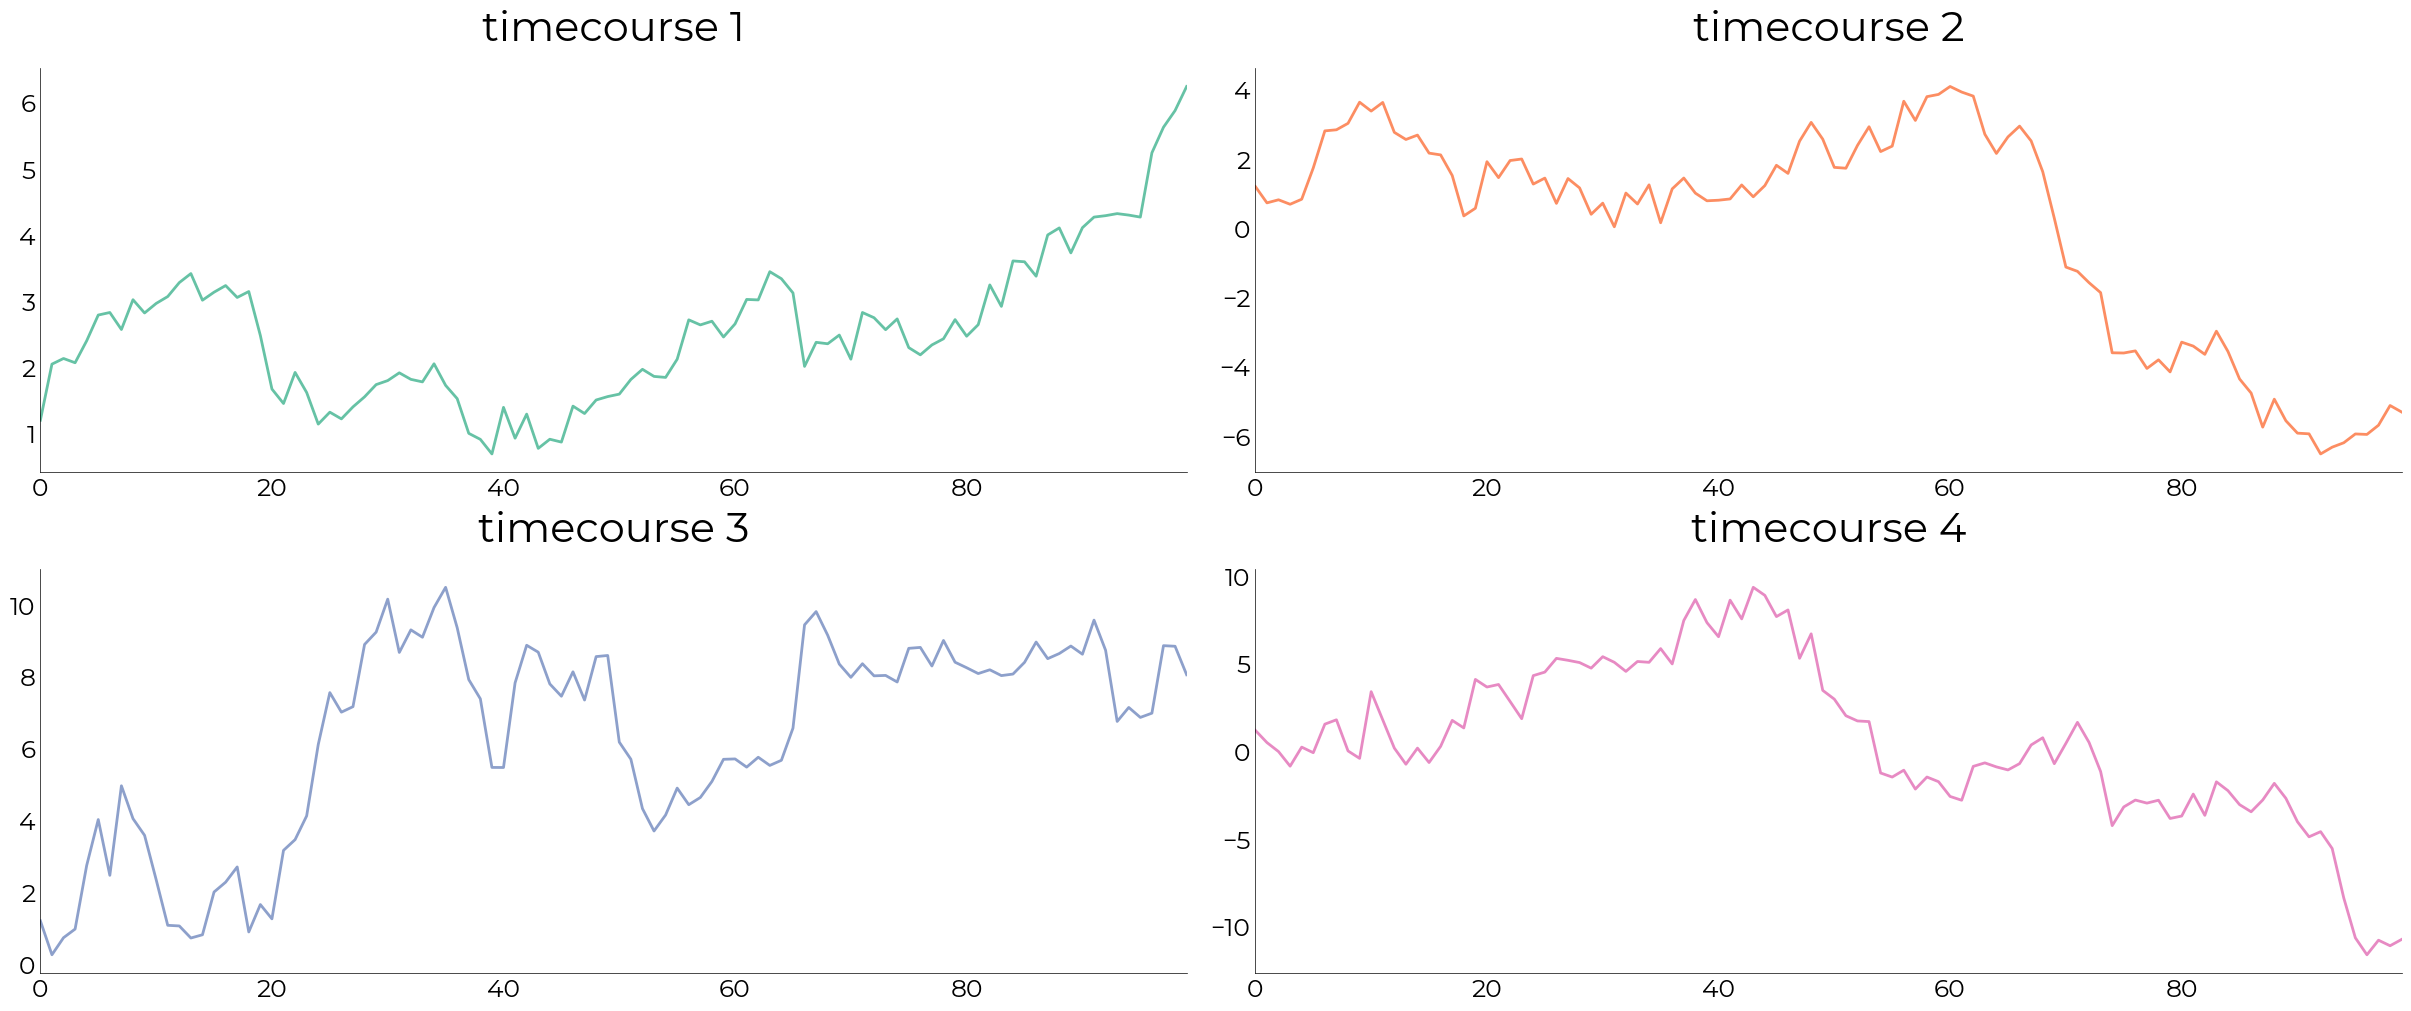

In [28]:
# initialize the figure. Figsize only specified in plt.figure, not in LazyPlot
fig = plt.figure(constrained_layout=True, figsize=(24,10))
# specify the grid
gs = fig.add_gridspec(2,2)

# collect fake timecourses in list so we can index them
timecourses = [ts1, ts2, ts3, ts4]
colors = sns.color_palette("Set2", len(timecourses))

for ii in range(len(timecourses)):

    # add subplot to figure on axis in gridspec
    ax = fig.add_subplot(gs[ii])
    
    # give the axis to LazyPlot
    plotting.LazyPlot(
        timecourses[ii],
        axs=ax,
        set_xlim_zero=True,
        title=f"timecourse {ii+1}",
        line_width=2,
        color=colors[ii],
        font_size=30,
        label_size=18)
    